In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ACTIONS_SPACE = ('U','D','L','R')

class grid:
    
    def __init__(self,rows,cols,start_position):
        self.rows = rows
        self.cols = cols
        self.i = start_position[0]
        self.j = start_position[1]
    
    def set_grid(self,rewards,actions):
        self.actions = actions #allowed actions in each state
        self.rewards = rewards
        
    def set_state(self,s):
        self.i = s[0]
        self.j = s[1]
    
    def current_state(self):
        return (self.i,self.j)
    
    def is_terminal(self,s):
        return s not in self.actions
    
    def reset(self):
        self.i = 2
        self.j = 0
        return (self.i,self.j)
        
    def move(self,a):
        if a in self.actions[(self.i,self.j)]:
            if a=='U':
                self.i -= 1
            elif a=='D':
                self.i += 1
            elif a=='L':
                self.j -= 1
            elif a=='R':
                self.j += 1
        
        return self.rewards.get((self.i,self.j),0)
    
    def get_next_state(self,s,a):
        i = s[0]
        j = s[1]
        if a in self.actions[(i,j)]:
            if a=='U':
                i -= 1
            elif a=='D':
                i += 1
            elif a=='L':
                j -= 1
            elif a=='R':
                j += 1
        return i,j
    
    def game_over(self):
        return (self.i,self.j) not in self.actions
    
    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())
##################################################################

def standard_grid():
    g = grid(3,4,(2,0))
    rewards = {(0,3): 1 , (1,3): -1}
    actions = {
        (0,0): {'D','R'},
        (0,1): {'L','R'},
        (0,2): {'L','D','R'},
        (1,0): {'U','D'},
        (1,2): {'U','D','R'},
        (2,0): {'U','R'},
        (2,1): {'L','R'},
        (2,2): {'L','R','U'},
        (2,3): {'L','U'}
    }
    
    g.set_grid(rewards,actions)
    return g 


def negative_grid(step_cost = -0.1):
    g = standard_grid()
    g.rewards.update({
        (0,0): step_cost,
        (0,1): step_cost,
        (0,2): step_cost,
        (1,0): step_cost,
        (1,2): step_cost,
        (2,0): step_cost,
        (2,1): step_cost,
        (2,2): step_cost,
        (2,3): step_cost,
        })
    return g
################################################################

class WindyGrid:
    
    def __init__(self,rows,cols,start):
        self.rows = rows
        self.cols = cols
        self.i = start[0]
        self.j = start[1]
    def set_grid(self,rewards,actions,probs):
        self.rewards = rewards
        self.actions = actions
        self.probs = probs
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
    
    def current_state(self):
        return (self.i,self.j)
    
    def is_terminal(self,s):
        return s not in self.actions
    
    def move(self,action):
        s = (self.i,self.j)
        a = action
        next_states_and_probs = self.probs[(s,a)]
        next_states = list(next_states_and_probs.keys())
        next_probs = list(next_states_and_probs.values())
        next_state_idx = np.random.choice(len(next_probs), p = next_probs)
        s2 = next_states[next_state_idx]
        
        self.i,self.j = s2
        
        return self.rewards.get(s2,0)
    
    def game_over(self):
        return (self.i,self.j) not in self.actions
    
    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())

    
def windy_grid():
    g = WindyGrid(3,4,(2,0))
    rewards = {(0,3): 1 , (1,3): -1}
    actions = {
        (0, 0): ('D', 'R'),
        (0, 1): ('L', 'R'),
        (0, 2): ('L', 'D', 'R'),
        (1, 0): ('U', 'D'),
        (1, 2): ('U', 'D', 'R'),
        (2, 0): ('U', 'R'),
        (2, 1): ('L', 'R'),
        (2, 2): ('L', 'R', 'U'),
        (2, 3): ('L', 'U'),
      }

    probs = {
        ((2, 0), 'U'): {(1, 0): 1.0},
        ((2, 0), 'D'): {(2, 0): 1.0},
        ((2, 0), 'L'): {(2, 0): 1.0},
        ((2, 0), 'R'): {(2, 1): 1.0},
        ((1, 0), 'U'): {(0, 0): 1.0},
        ((1, 0), 'D'): {(2, 0): 1.0},
        ((1, 0), 'L'): {(1, 0): 1.0},
        ((1, 0), 'R'): {(1, 0): 1.0},
        ((0, 0), 'U'): {(0, 0): 1.0},
        ((0, 0), 'D'): {(1, 0): 1.0},
        ((0, 0), 'L'): {(0, 0): 1.0},
        ((0, 0), 'R'): {(0, 1): 1.0},
        ((0, 1), 'U'): {(0, 1): 1.0},
        ((0, 1), 'D'): {(0, 1): 1.0},
        ((0, 1), 'L'): {(0, 0): 1.0},
        ((0, 1), 'R'): {(0, 2): 1.0},
        ((0, 2), 'U'): {(0, 2): 1.0},
        ((0, 2), 'D'): {(1, 2): 1.0},
        ((0, 2), 'L'): {(0, 1): 1.0},
        ((0, 2), 'R'): {(0, 3): 1.0},
        ((2, 1), 'U'): {(2, 1): 1.0},
        ((2, 1), 'D'): {(2, 1): 1.0},
        ((2, 1), 'L'): {(2, 0): 1.0},
        ((2, 1), 'R'): {(2, 2): 1.0},
        ((2, 2), 'U'): {(1, 2): 1.0},
        ((2, 2), 'D'): {(2, 2): 1.0},
        ((2, 2), 'L'): {(2, 1): 1.0},
        ((2, 2), 'R'): {(2, 3): 1.0},
        ((2, 3), 'U'): {(1, 3): 1.0},
        ((2, 3), 'D'): {(2, 3): 1.0},
        ((2, 3), 'L'): {(2, 2): 1.0},
        ((2, 3), 'R'): {(2, 3): 1.0},
        ((1, 2), 'U'): {(0, 2): 0.5, (1, 3): 0.5},
        ((1, 2), 'D'): {(2, 2): 1.0},
        ((1, 2), 'L'): {(1, 2): 1.0},
        ((1, 2), 'R'): {(1, 3): 1.0},
      }
    g.set(rewards, actions, probs)
    return g


def windy_grid_penalized(step_cost=-0.1):
    g = WindyGrid(3, 4, (2, 0))
    rewards = {
        (0, 0): step_cost,
        (0, 1): step_cost,
        (0, 2): step_cost,
        (1, 0): step_cost,
        (1, 2): step_cost,
        (2, 0): step_cost,
        (2, 1): step_cost,
        (2, 2): step_cost,
        (2, 3): step_cost,
        (0, 3): 1,
        (1, 3): -1
      }
    actions = {
        (0, 0): ('D', 'R'),
        (0, 1): ('L', 'R'),
        (0, 2): ('L', 'D', 'R'),
        (1, 0): ('U', 'D'),
        (1, 2): ('U', 'D', 'R'),
        (2, 0): ('U', 'R'),
        (2, 1): ('L', 'R'),
        (2, 2): ('L', 'R', 'U'),
        (2, 3): ('L', 'U'),
      }
    
    probs = {
        ((2, 0), 'U'): {(1, 0): 1.0},
        ((2, 0), 'D'): {(2, 0): 1.0},
        ((2, 0), 'L'): {(2, 0): 1.0},
        ((2, 0), 'R'): {(2, 1): 1.0},
        ((1, 0), 'U'): {(0, 0): 1.0},
        ((1, 0), 'D'): {(2, 0): 1.0},
        ((1, 0), 'L'): {(1, 0): 1.0},
        ((1, 0), 'R'): {(1, 0): 1.0},
        ((0, 0), 'U'): {(0, 0): 1.0},
        ((0, 0), 'D'): {(1, 0): 1.0},
        ((0, 0), 'L'): {(0, 0): 1.0},
        ((0, 0), 'R'): {(0, 1): 1.0},
        ((0, 1), 'U'): {(0, 1): 1.0},
        ((0, 1), 'D'): {(0, 1): 1.0},
        ((0, 1), 'L'): {(0, 0): 1.0},
        ((0, 1), 'R'): {(0, 2): 1.0},
        ((0, 2), 'U'): {(0, 2): 1.0},
        ((0, 2), 'D'): {(1, 2): 1.0},
        ((0, 2), 'L'): {(0, 1): 1.0},
        ((0, 2), 'R'): {(0, 3): 1.0},
        ((2, 1), 'U'): {(2, 1): 1.0},
        ((2, 1), 'D'): {(2, 1): 1.0},
        ((2, 1), 'L'): {(2, 0): 1.0},
        ((2, 1), 'R'): {(2, 2): 1.0},
        ((2, 2), 'U'): {(1, 2): 1.0},
        ((2, 2), 'D'): {(2, 2): 1.0},
        ((2, 2), 'L'): {(2, 1): 1.0},
        ((2, 2), 'R'): {(2, 3): 1.0},
        ((2, 3), 'U'): {(1, 3): 1.0},
        ((2, 3), 'D'): {(2, 3): 1.0},
        ((2, 3), 'L'): {(2, 2): 1.0},
        ((2, 3), 'R'): {(2, 3): 1.0},
        ((1, 2), 'U'): {(0, 2): 0.5, (1, 3): 0.5},
        ((1, 2), 'D'): {(2, 2): 1.0},
        ((1, 2), 'L'): {(1, 2): 1.0},
        ((1, 2), 'R'): {(1, 3): 1.0},
      }
    g.set(rewards, actions, probs)
    return g


def epsilon_greedy(Q,eps=0.1):
    p = np.random.random()
    if p < (1- eps):
        maxVal = max(Q.values())
        max_keys = [key for key , val in Q.items() if val ==maxVal]
        return np.random.choice(max_keys)
    else:
        return np.random.choice(ACTIONS_SPACE)
        
    


def print_policy(P, g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i,j), ' ')
            print("  %s  |" % a, end="")
        print("")

def print_values(V, g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")
        print("")
        


0
2000
4000
6000
8000


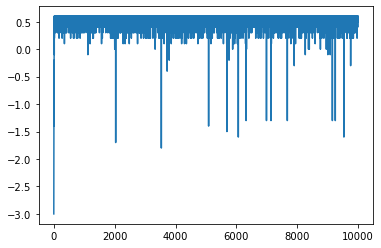

update counts:
---------------------------
 0.19| 0.19| 0.19| 0.00|
---------------------------
 0.20| 0.00| 0.01| 0.00|
---------------------------
 0.20| 0.01| 0.01| 0.00|
values:
---------------------------
 0.58| 0.79| 1.00| 0.00|
---------------------------
 0.41| 0.00| 0.76| 0.00|
---------------------------
 0.25| 0.31| 0.50| 0.17|

 policy:
---------------------------
  ['R']  |  ['R']  |  ['R']  |     |
---------------------------
  ['U']  |     |  ['U']  |     |
---------------------------
  ['U']  |  ['R']  |  ['U']  |  ['L']  |


In [3]:
g = negative_grid()
Q = {}
for s in g.all_states():
    Q[s] = {}
    for a in ACTIONS_SPACE:
        Q[s][a] = 0
alpha = 0.1
gamma = 0.9
n_episodes = 10000
reward_per_episode = []
update_counts = {}
for i in range(n_episodes):
    if  i % 2000 == 0:
        print(i)
    
    s = g.reset()
    a = epsilon_greedy(Q[s])
    episode_reward = 0
    
    while not g.game_over():
        r = g.move(a)
        s2 = g.current_state()
        episode_reward += r
        
        a2 = epsilon_greedy(Q[s2])
    
        Q[s][a] = Q[s][a] + alpha *(r+gamma*Q[s2][a2] - Q[s][a])
        update_counts[s] = update_counts.get(s,0) + 1
        s = s2
        a = a2
    reward_per_episode.append(episode_reward)
plt.plot(reward_per_episode)
plt.show()

policy = {}
V = {}
for s in  g.actions.keys():
    maxVal = max(Q[s].values())
    max_key = [key for key , val in Q[s].items() if val ==maxVal]
    policy[s] =  max_key
    V[s] = maxVal
    
print("update counts:")
total = np.sum(list(update_counts.values()))
for k, v in update_counts.items():
    update_counts[k] = float(v) / total
print_values(update_counts, g)
print("values:")
print_values(V, g)
print("\n policy:")
print_policy(policy, g)